In [96]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, LSTM
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import mean_absolute_error
t = pd.read_excel(r'C:\Users\DELL\Desktop\EXPERTISE\j3.xlsx')
t

,date,value
0,2023-11-14 00:04:00,32.002560
1,2023-11-14 00:05:00,30.205552
2,2023-11-14 00:06:00,32.075269
3,2023-11-14 00:06:00,29.829009
4,2023-11-14 00:08:00,28.703713
...,...,...
2060,2023-11-14 17:41:00,37.803028
2061,2023-11-14 17:42:00,35.705977
2062,2023-11-14 17:42:00,33.459176
2063,2023-11-14 17:42:00,31.961669


In [97]:

aim = 'value'
df=t[['date',aim]]
df['value'] = df['value'].astype(float)
df

,date,value
0,2023-11-14 00:04:00,32.002560
1,2023-11-14 00:05:00,30.205552
2,2023-11-14 00:06:00,32.075269
3,2023-11-14 00:06:00,29.829009
4,2023-11-14 00:08:00,28.703713
...,...,...
2060,2023-11-14 17:41:00,37.803028
2061,2023-11-14 17:42:00,35.705977
2062,2023-11-14 17:42:00,33.459176
2063,2023-11-14 17:42:00,31.961669


In [98]:
import pandas as pd


# Assuming 'date' is the column with hour values

df.date=pd.to_datetime(df.date,  format='%H:%M:%S')
df.set_index("date",inplace=True)

# Convert 'value' to float
df['value'] = df['value'].astype(float)
df

,value
date,
2023-11-14 00:04:00,32.002560
2023-11-14 00:05:00,30.205552
2023-11-14 00:06:00,32.075269
2023-11-14 00:06:00,29.829009
2023-11-14 00:08:00,28.703713
...,...
2023-11-14 17:41:00,37.803028
2023-11-14 17:42:00,35.705977
2023-11-14 17:42:00,33.459176


In [99]:

train_data = df.iloc[:500]
test_data = df.iloc[500:]
test_data

,value
date,
2023-11-14 05:02:00,41.792949
2023-11-14 05:03:00,39.995941
2023-11-14 05:04:00,36.025924
2023-11-14 05:06:00,41.489476
2023-11-14 05:06:00,39.243397
...,...
2023-11-14 17:41:00,37.803028
2023-11-14 17:42:00,35.705977
2023-11-14 17:42:00,33.459176


In [100]:
train_data

,value
date,
2023-11-14 00:04:00,32.002560
2023-11-14 00:05:00,30.205552
2023-11-14 00:06:00,32.075269
2023-11-14 00:06:00,29.829009
2023-11-14 00:08:00,28.703713
...,...
2023-11-14 05:01:00,42.094075
2023-11-14 05:01:00,40.297067
2023-11-14 05:02:00,38.500059


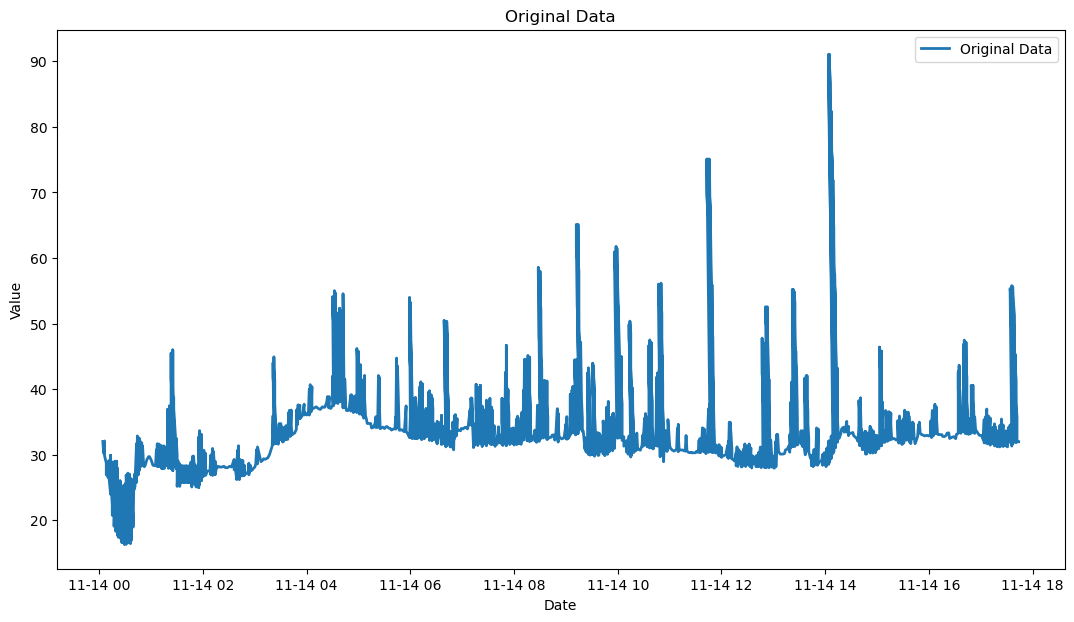

In [101]:
import matplotlib.pyplot as plt

# Assuming 'value' is the column you want to plot
plt.figure(figsize=(13, 7))
plt.plot(df.index, df['value'], label='Original Data', linewidth=2)
plt.title('Original Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [102]:
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('low', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16);

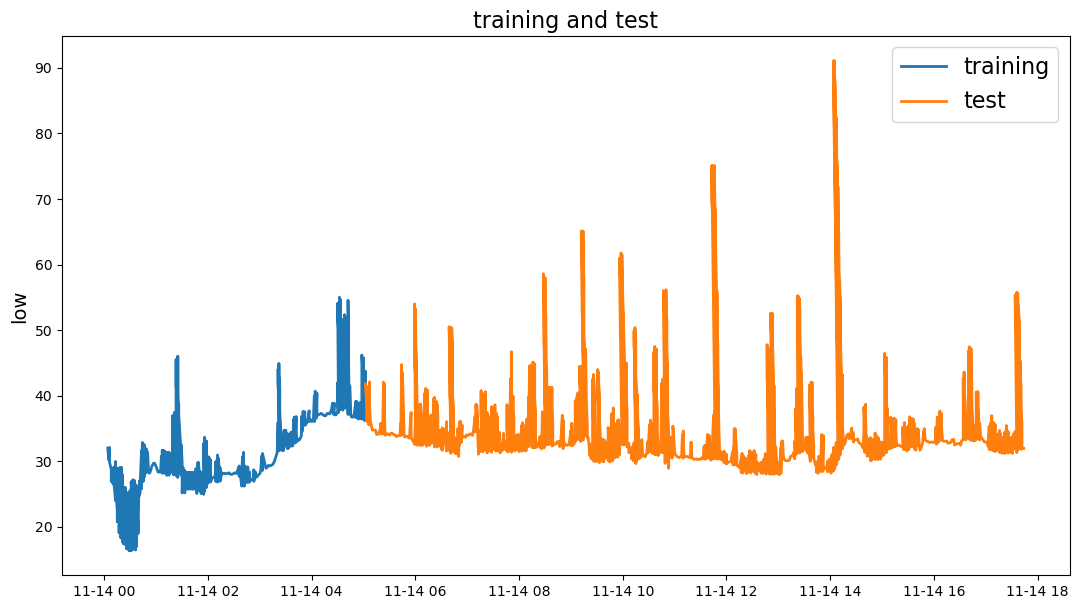

In [103]:
line_plot(train_data['value'], test_data['value'], 'training', 'test', title='training and test')


In [104]:

def extract_window_data(continuous, window_len=5, zero_base=True):
    window_data = []
    for idx in range(len(continuous) - window_len):
        tmp = continuous[idx: (idx + window_len)].copy()
        if zero_base:
            tmp = normalise_zero_base(tmp)
        window_data.append(tmp.values)
    return np.array(window_data)
def prepare_data(continuous, aim, window_len=10, zero_base=True, test_size=0.2):
    X_train = extract_window_data(train_data, window_len, zero_base)
    X_test = extract_window_data(test_data, window_len, zero_base)
    y_train = train_data[aim][window_len:].values
    y_test = test_data[aim][window_len:].values
    if zero_base:
        y_train = y_train / train_data[aim][:-window_len].values - 1
        y_test = y_test / test_data[aim][:-window_len].values - 1

    return train_data, test_data, X_train, X_test, y_train, y_test
import numpy as np

In [105]:
def normalise_zero_base(continuous):
    return continuous / continuous.iloc[0] - 1

def normalise_min_max(continuous):
    return (continuous - continuous.min()) / (data.max() - continuous.min())

In [106]:
from tensorflow.keras import layers
     

def build_lstm_model(input_data, output_size, neurons, activ_func='linear',
                     dropout=0.2, loss='mse', optimizer='adam'):
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(input_data.shape[1], input_data.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer)
    return model
np.random.seed(245)
window_len = 5
test_size = 0.33
zero_base = True
lstm_neurons = 50
epochs = 200
batch_size = 10
loss = 'mse'
dropout = 0.24
optimizer = 'adam'
train_data, test_data, X_train, X_test, y_train, y_test = prepare_data(
    df, aim, window_len=window_len, zero_base=zero_base, test_size=test_size)

In [107]:
print(X_train.shape)

(495, 5, 1)


In [108]:
model = build_lstm_model(
    X_train, output_size=1, neurons=lstm_neurons, dropout=dropout, loss=loss,
    optimizer=optimizer)
modelfit = model.fit(
    X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)

Epoch 1/200
50/50 [==============================] - 4s 26ms/step - loss: 0.0191 - val_loss: 0.0398
Epoch 2/200
50/50 [==============================] - 1s 11ms/step - loss: 0.0154 - val_loss: 0.0357
Epoch 3/200
50/50 [==============================] - 1s 11ms/step - loss: 0.0149 - val_loss: 0.0340
Epoch 4/200
50/50 [==============================] - 1s 11ms/step - loss: 0.0144 - val_loss: 0.0324
Epoch 5/200
50/50 [==============================] - 1s 14ms/step - loss: 0.0143 - val_loss: 0.0318
Epoch 6/200
50/50 [==============================] - 1s 11ms/step - loss: 0.0134 - val_loss: 0.0311
Epoch 7/200
50/50 [==============================] - 1s 11ms/step - loss: 0.0135 - val_loss: 0.0300
Epoch 8/200
50/50 [==============================] - 1s 12ms/step - loss: 0.0134 - val_loss: 0.0299
Epoch 9/200
50/50 [==============================] - 1s 11ms/step - loss: 0.0131 - val_loss: 0.0286
Epoch 10/200
50/50 [==============================] - 1s 11ms/step - loss: 0.0131 - val_loss: 0.0275

50/50 [==============================] - 1s 12ms/step - loss: 0.0126 - val_loss: 0.0242
Epoch 83/200
50/50 [==============================] - 1s 11ms/step - loss: 0.0126 - val_loss: 0.0231
Epoch 84/200
50/50 [==============================] - 1s 11ms/step - loss: 0.0123 - val_loss: 0.0249
Epoch 85/200
50/50 [==============================] - 1s 12ms/step - loss: 0.0124 - val_loss: 0.0239
Epoch 86/200
50/50 [==============================] - 1s 12ms/step - loss: 0.0125 - val_loss: 0.0238
Epoch 87/200
50/50 [==============================] - 1s 11ms/step - loss: 0.0125 - val_loss: 0.0236
Epoch 88/200
50/50 [==============================] - 1s 11ms/step - loss: 0.0123 - val_loss: 0.0234
Epoch 89/200
50/50 [==============================] - 1s 11ms/step - loss: 0.0124 - val_loss: 0.0235
Epoch 90/200
50/50 [==============================] - 1s 11ms/step - loss: 0.0125 - val_loss: 0.0242
Epoch 91/200
50/50 [==============================] - 1s 13ms/step - loss: 0.0122 - val_loss: 0.0243
Epo

50/50 [==============================] - 1s 14ms/step - loss: 0.0121 - val_loss: 0.0258
Epoch 163/200
50/50 [==============================] - 1s 14ms/step - loss: 0.0120 - val_loss: 0.0249
Epoch 164/200
50/50 [==============================] - 1s 17ms/step - loss: 0.0121 - val_loss: 0.0250
Epoch 165/200
50/50 [==============================] - 1s 18ms/step - loss: 0.0122 - val_loss: 0.0253
Epoch 166/200
50/50 [==============================] - 1s 14ms/step - loss: 0.0119 - val_loss: 0.0251
Epoch 167/200
50/50 [==============================] - 1s 10ms/step - loss: 0.0121 - val_loss: 0.0255
Epoch 168/200
50/50 [==============================] - 0s 10ms/step - loss: 0.0120 - val_loss: 0.0250
Epoch 169/200
50/50 [==============================] - 1s 11ms/step - loss: 0.0121 - val_loss: 0.0259
Epoch 170/200
50/50 [==============================] - 1s 10ms/step - loss: 0.0118 - val_loss: 0.0256
Epoch 171/200
50/50 [==============================] - 1s 10ms/step - loss: 0.0121 - val_loss: 0

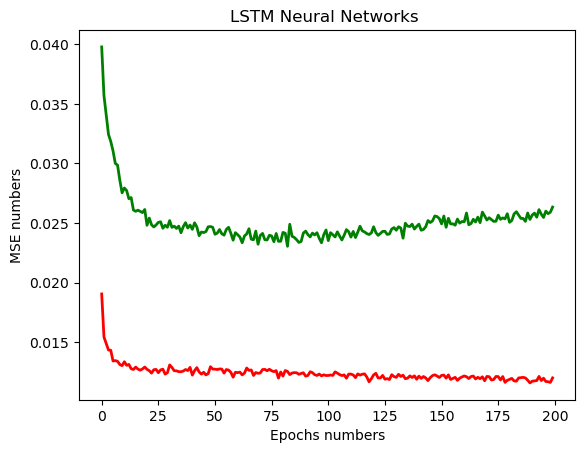

In [109]:

import matplotlib.pyplot as plt
plt.plot(modelfit.history['loss'],'r',linewidth=2, label='Training loss')
plt.plot(modelfit.history['val_loss'], 'g',linewidth=2, label='Validation loss')
plt.title('LSTM Neural Networks ')
plt.xlabel('Epochs numbers')
plt.ylabel('MSE numbers')
plt.show()

In [110]:
targets = test_data[aim][window_len:]
preds = model.predict(X_test).squeeze()
mean_absolute_error(preds, y_test)

49/49 [==============================] - 1s 3ms/step


0.10037512051945029

In [111]:
from sklearn.metrics import mean_squared_error
SCORE_MSE=mean_squared_error(preds, y_test)
SCORE_MSE

0.026344817346706934

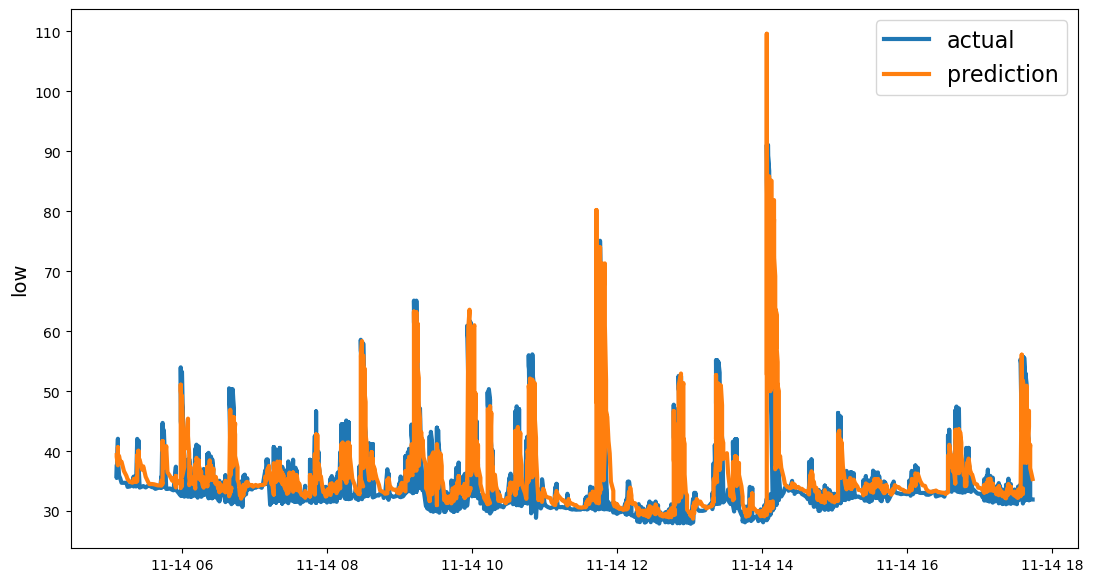

In [112]:
preds = test_data[aim].values[:-window_len] * (preds + 1)
preds = pd.Series(index=targets.index, data=preds)
line_plot(targets, preds, 'actual', 'prediction', lw=3)

In [113]:
# Calculate residuals
residuals = preds - targets.values

h=residuals**2
residuals

date
2023-11-14 05:06:00    1.902199
2023-11-14 05:06:00    3.528495
2023-11-14 05:07:00   -4.428934
2023-11-14 05:07:00    0.392687
2023-11-14 05:07:00    0.952312
                         ...   
2023-11-14 17:41:00    0.470946
2023-11-14 17:42:00    5.388278
2023-11-14 17:42:00    5.690858
2023-11-14 17:42:00    5.235342
2023-11-14 17:44:00    3.410992
Length: 1560, dtype: float64

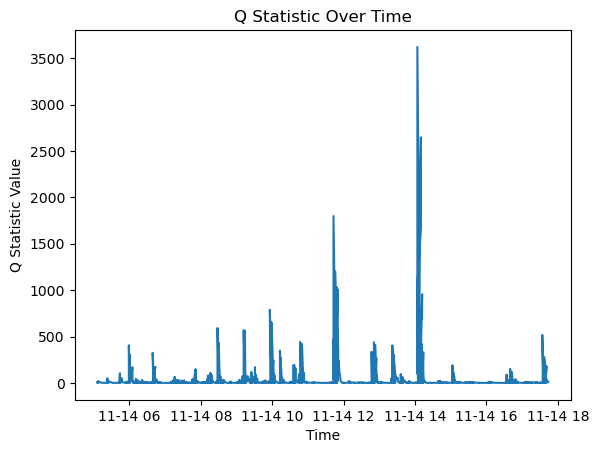

In [114]:
# Plotting Q statistic over time
plt.plot(h)
plt.title('Q Statistic Over Time')
plt.xlabel('Time')
plt.ylabel('Q Statistic Value')
plt.show()